In [2]:
import sys # importing the package sys which lets you talk to your computer system.

assert sys.version_info >= (3, 7) #versions are expressed a pair of numbers (3, 7) which is equivalent to 3.7. 

In [3]:
from packaging import version #import the package "version"
import sklearn # import scikit-learn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1") 

In [4]:
import matplotlib.pyplot as plt

plt.rc('font', size=14) #general font size
plt.rc('axes', labelsize=14, titlesize=14) #font size for the titles of x and y axes
plt.rc('legend', fontsize=14) # font size for legends
plt.rc('xtick', labelsize=10) # the font size of labels for intervals marked on the x axis
plt.rc('ytick', labelsize=10) # the font size of labels for intervals marked on the y axis

In [5]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "classification"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## Machine Learning Workflow

The diagram below illustrates the workflow from data collection to model deployment.

![Machine Learning Workflow](machine_learning_workflow.jpg)


### Explanation

- **Data Collection:** The raw data is gathered from various sources.
- **Data Preprocessing:** Cleaning and preparing data for analysis.
- **Feature Engineering:** Creating or selecting features that improve model performance.
- **Model Selection:** Choosing an appropriate machine learning algorithm.
- **Training:** Training the model on the prepared data.
- **Evaluation:** Assessing the model’s performance.
- **Prediction:** Making predictions on new data.
  
For a museum curator or a wider audience, it can be helpful to present the machine learning workflow as a series of clear, visual steps. For example, you might create a simplified diagram or animation that shows how raw data is transformed into predictions, emphasizing key stages like data collection, model training, and evaluation.

### Discussing with My Group

In our group discussion, we explored different ways to explain the machine learning workflow:

1. **Simplified Diagrams:** Using diagrams to visually represent each step in the workflow.
2. **Real-World Examples:** Relating the workflow to familiar real-world scenarios to make the concept more relatable.
3. **Interactive Visuals:** Incorporating interactive elements or animations to illustrate how data flows through the model.



### Task 1-4: Framing the Problem

#### Step 1: Reflection on Framing the Problem

**Reflection:**

Framing the problem precisely is crucial in machine learning as it determines the type of data needed, the algorithm to use, and the overall approach to solving the problem. The academic article “Rethinking the field of automatic prediction of court decisions” by Medvedeva, Wieling & Vols (2023) highlights how different objectives necessitate different data characteristics and algorithms. For example, predicting court decisions may require a deep understanding of legal context and historical cases, impacting the choice of features and models.

The BBC article “AI facial recognition: Campaigners and MPs call for ban” underscores that the same data can raise ethical and privacy concerns depending on its application. In the context of our tasks, framing the problem accurately helps in understanding not only how to build a model but also the implications of its deployment. Precise problem definition ensures that the model’s predictions align with the intended use and mitigates potential misuse or ethical issues.

**Summary:**
- **Task Definition**: Clearly defines the goal (e.g., predicting housing prices, classifying handwritten digits).
- **Data Selection**: Guides the choice of features and data sources.
- **Algorithm Choice**: Influences the selection of suitable algorithms (e.g., regression vs classification).
- **Ethical Considerations**: Helps anticipate and address potential ethical and privacy concerns.

#### Step 2: Selecting the Algorithm

**Discussion Results:**

1. **Predicting Median Housing Prices:**
   - **Algorithm Type**: **Regression**
   - **Reasoning**: Since the goal is to predict a continuous numerical value (median housing prices), regression is the appropriate choice. Regression algorithms model the relationship between features (e.g., square footage, number of bedrooms) and a continuous target variable.

2. **Handwritten Digit Recognition:**
   - **Algorithm Type**: **Classification**
   - **Reasoning**: This task involves categorizing images into discrete classes (digits 0-9). Classification algorithms are designed to handle problems where the output is a category or label rather than a continuous value.

**Summary:**
- **Regression** is used for predicting continuous values, making it suitable for median housing prices.
- **Classification** is used for categorizing data into discrete classes, appropriate for digit recognition.

#### Step 3: Before Data Collection

**Discussion Results:**

1. **Information for Predicting Median Housing Prices:**
   - **Key Features**:
     - Property characteristics (e.g., square footage, number of bedrooms/bathrooms)
     - Location details (e.g., neighborhood, proximity to amenities)
     - Economic indicators (e.g., average income, employment rates)
     - Historical price trends

   - **Geographical and Cultural Considerations**:
     - **Geographical Differences**: Housing markets can vary significantly between regions (e.g., urban vs rural, coastal vs inland). Collecting data that reflects these differences is crucial.
     - **Cultural Differences**: Preferences and values related to housing can differ across cultures (e.g., importance of proximity to schools or public transport).

   - **Bias in Data**:
     - **Geographical Bias**: Data collected from a specific region may not generalize to other areas.
     - **Cultural Bias**: Cultural factors may influence housing features and prices, which could affect the model's applicability to different regions.

**Summary:**
- Collect diverse data that includes key features affecting housing prices.
- Consider geographical and cultural differences to avoid biased models.
- Ensure data reflects a broad range of conditions for accurate predictions.


In [13]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

def load_housing_data(): #defines a function that loads the housing data available as .tgz file on a github URL
    tarball_path = Path("datasets/housing.tgz") # where you will save your compressed data
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True) #create datasets folder if it does not exist
        url = "https://github.com/ageron/data/raw/main/housing.tgz" # url of where you are getting your data from
        urllib.request.urlretrieve(url, tarball_path) # gets the url content and saves it at location specified by tarball_path
        with tarfile.open(tarball_path) as housing_tarball: # opens saved compressed file as housing_tarball
            housing_tarball.extractall(path="datasets") # extracts the compressed content to datasets folder
    return pd.read_csv(Path("datasets/housing/housing.csv")) #uses panadas to read the csv file from the extracted content

housing = load_housing_data() #runsthe function defined above

In [16]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [17]:
housing["ocean_proximity"].value_counts() # tells you what values the column for `ocean_proximity` can take

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

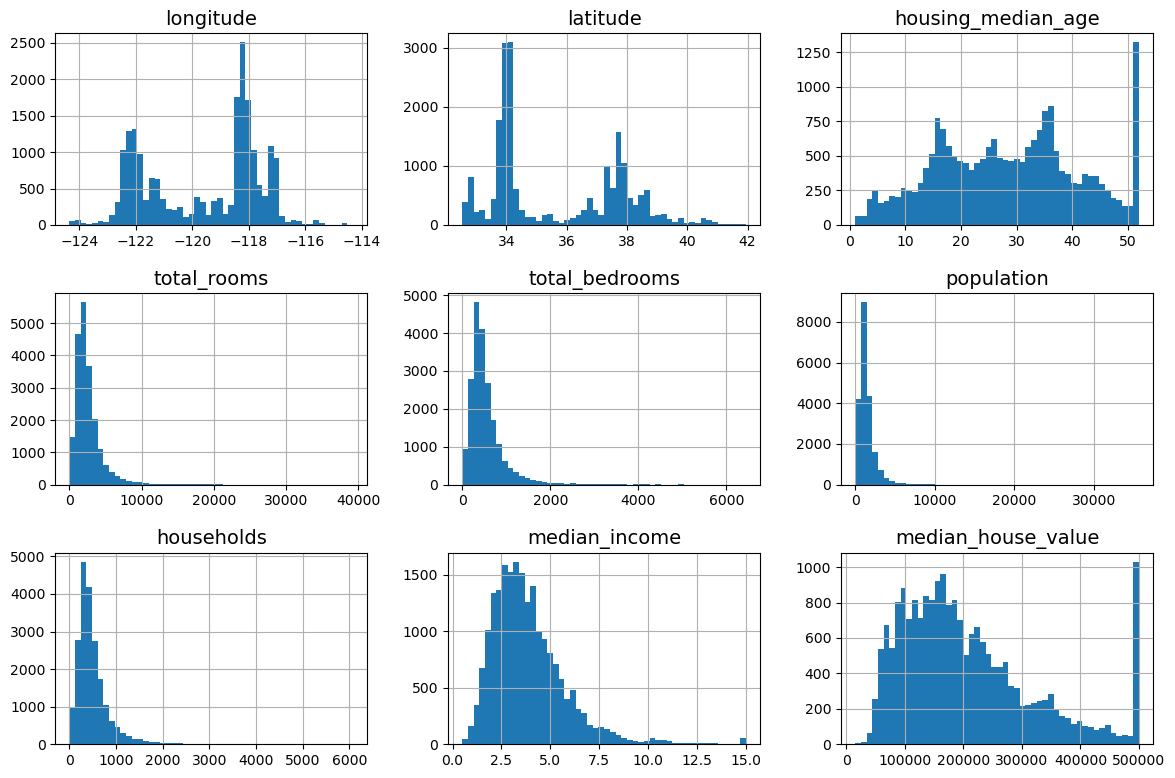

In [18]:
housing.hist(bins=50, figsize=(12, 8))
save_fig("attribute_histogram_plots")  # extra code
plt.show()

In [19]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [14]:
from sklearn.datasets import fetch_openml
import pandas as pd

mnist = fetch_openml('mnist_784', as_frame=False, parser='auto')

#mnist_dataframe = pd.DataFrame(data=mnist.data, columns=mnist.feature_names)

In [15]:
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

### Size of Each Image in MNIST

Each image in the MNIST dataset is:
- **28x28 pixels**
- **Grayscale** (single channel)

### Transformation from NIST to MNIST

LeCun, Cortes, and Burges reorganized the NIST dataset to create MNIST. Here's what they did:

1. **Creation of Training and Test Datasets**:
   - **NIST Data**: Originally had 60,000 training images and 10,000 test images with some variations and complexities.
   - **MNIST Reorganization**: The dataset was split into 60,000 training images and 10,000 test images, ensuring each digit was equally represented.

2. **Normalization**:
   - **Image Size**: NIST images were 32x32 pixels; MNIST images were resized to 28x28 pixels. This resizing was done to make the dataset more manageable and uniform.
   - **Centering**: Images were centered in a 32x32 pixel image but cropped to 28x28 pixels. This centering ensured consistency and reduced variance in digit positioning.

3. **Digit Representation**:
   - **Original Data**: NIST included handwritten digits from various sources, leading to diverse handwriting styles.
   - **MNIST Data**: MNIST used a controlled sample of digits for a cleaner and more uniform dataset.

### Reasons for Reorganisation

1. **Consistency**: Standardising image size and centering ensured uniform digit representation, which is crucial for effective model training.

2. **Simplification**: MNIST aimed to create a more uniform and simplified dataset, making it easier to benchmark and compare algorithms.

3. **Benchmarking**: MNIST provided a consistent dataset for evaluating image classification algorithms, facilitating meaningful comparisons and advancements in the field.

### Justification

The reorganization of the NIST dataset into MNIST was justified because:
- **Improved Benchmarking**: Offered a cleaner and more uniform dataset for better comparisons between models.
- **Enhanced Usability**: Made the dataset more accessible and usable for researchers and practitioners.
- **Educational Value**: MNIST serves as an excellent introductory dataset for learning and experimenting with image classification techniques.


In [20]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [21]:
# cell for python code

images = mnist.data
categories = mnist.target

# insert lines below to print the shape of images and to print the categories
print("Shape of images:", images.shape)
print("Target categories:", categories)


Shape of images: (70000, 784)
Target categories: ['5' '0' '4' ... '4' '5' '6']


In [22]:
#extra code to visualise the image of digits

import matplotlib.pyplot as plt

## the code below defines a function plot_digit. The initial key work `def` stands for define, followed by function name.
## the function take one argument image_data in a parenthesis. This is followed by a colon. 
## Each line below that will be executed when the function is used. 
## This cell only defines the function. The next cell uses the function.

def plot_digit(image_data): # defines a function so that you need not type all the lines below everytime you view an image
    image = image_data.reshape(28, 28) #reshapes the data into a 28 x 28 image - before it was a string of 784 numbers
    plt.imshow(image, cmap="binary") # show the image in black and white - binary.
    plt.axis("off") # ensures no x and y axes are displayed

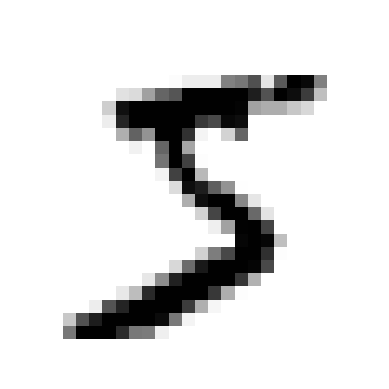

In [23]:
# visualise a selected digit with the following code

some_digit = mnist.data[0]
plot_digit(some_digit)
plt.show()

## Task 3.1: Stratified Sample: Housing Data


In [25]:
import numpy as np
import pandas as pd

housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

In [26]:
from sklearn.model_selection import train_test_split

tratio = 0.2 #to get 20% for testing and 80% for training

strat_train_set, strat_test_set = train_test_split(housing, test_size=tratio, stratify=housing["income_cat"], random_state=42)

In [27]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set) #Prints out in order of the highest proportion first.

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

### Discussion: Stratified Sampling Based on Median Income

1. **Representation of Different Income Levels**: Stratified sampling based on median income ensures that all income levels are adequately represented in the sample. This is crucial because income can significantly influence housing prices, and having a balanced representation allows the model to learn patterns across different income groups.

2. **Reducing Sampling Bias**: By ensuring that each income category is proportionally represented, stratified sampling reduces sampling bias. This helps in creating a more robust and generalizable model that performs well across different segments of the population.

3. **Improved Model Performance**: Stratified sampling can lead to improved model performance. When the training data reflects the income distribution of the population, the model is better equipped to make accurate predictions for new data points across various income levels.

4. **Fair Evaluation**: During the evaluation phase, having a stratified sample allows for a fair assessment of the model's performance. It ensures that the model's accuracy is not skewed by an overrepresentation of any particular income group, providing a clearer picture of its real-world applicability.

Overall, using a stratified sample based on median income helps in creating a balanced, unbiased, and effective machine learning model.


## Task 3.2: Setting Aside Test Set for Image Data

In [30]:
# Assigning the first 60,000 images to the training set
X_train = mnist.data[:60000]
# Assigning the corresponding first 60,000 labels to the training set
y_train = mnist.target[:60000]

# Assigning the remaining 10,000 images to the test set
X_test = mnist.data[60000:]
# Assigning the corresponding remaining 10,000 labels to the test set
y_test = mnist.target[60000:]

# Printing shapes to verify the split
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (60000, 784)
y_train shape: (60000,)
X_test shape: (10000, 784)
y_test shape: (10000,)


## Task 4-1: Housing Data and Linear Regression

In [32]:
housing = strat_train_set.copy()

In [33]:
corr_matrix = housing.corr(numeric_only=True) # argument is so that it only calculates for numeric value features
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688380
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
longitude            -0.050859
latitude             -0.139584
Name: median_house_value, dtype: float64

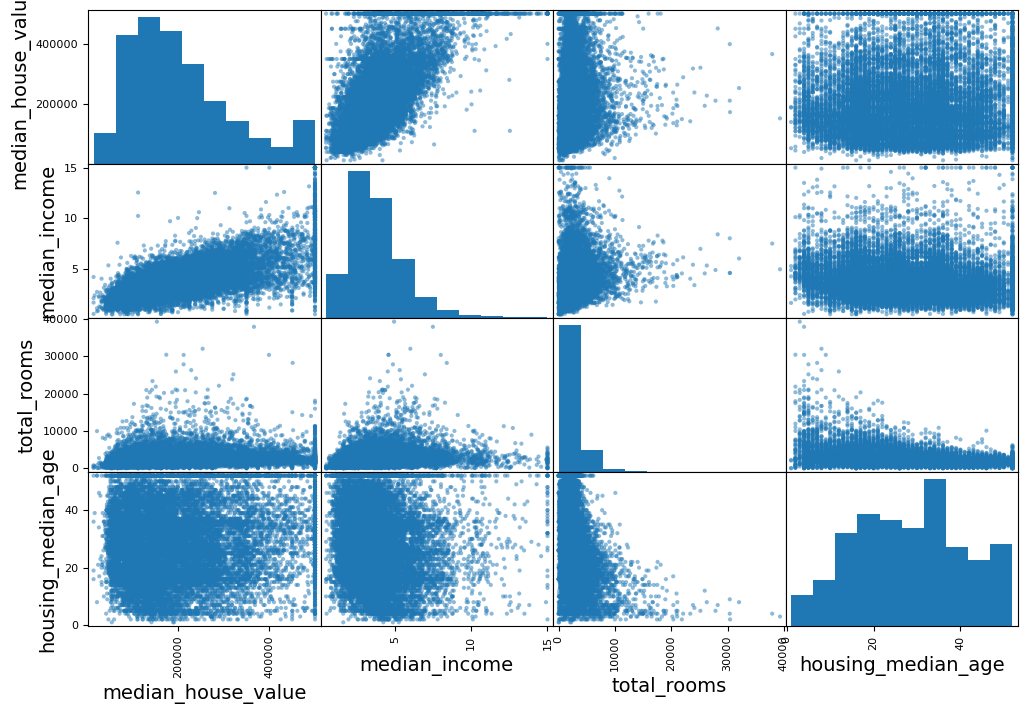

In [34]:
from pandas.plotting import scatter_matrix

features = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[features], figsize=(12, 8))
#save_fig("scatter_matrix_plot")  

#The line above is extra code you can uncomment (remove the hash at the begining) to save the image.
#But, to use this, make sure you ran the code at the beginning of this notebook defining the save_fig function

plt.show()

In [35]:
housing = strat_train_set.drop("median_house_value", axis=1) ## 1)
housing_labels = strat_train_set["median_house_value"].copy() ## 2)

In [37]:
housing.info()


<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 13096 to 19888
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   longitude           16512 non-null  float64 
 1   latitude            16512 non-null  float64 
 2   housing_median_age  16512 non-null  float64 
 3   total_rooms         16512 non-null  float64 
 4   total_bedrooms      16344 non-null  float64 
 5   population          16512 non-null  float64 
 6   households          16512 non-null  float64 
 7   median_income       16512 non-null  float64 
 8   ocean_proximity     16512 non-null  object  
 9   income_cat          16512 non-null  category
dtypes: category(1), float64(8), object(1)
memory usage: 1.3+ MB


In [38]:
# this is the code for Option 1 above. 
housing_option1 = housing.copy() #This makes a copy of the data to variable housing_option1, so that we don't mess up the original data.

housing_option1.dropna(subset=["total_bedrooms"], inplace=True)  # option 1 - dropping the rows where total_bedroom is missing values.

housing_option1.info() #look for missing values after rows have been dropped

<class 'pandas.core.frame.DataFrame'>
Index: 16344 entries, 13096 to 19888
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   longitude           16344 non-null  float64 
 1   latitude            16344 non-null  float64 
 2   housing_median_age  16344 non-null  float64 
 3   total_rooms         16344 non-null  float64 
 4   total_bedrooms      16344 non-null  float64 
 5   population          16344 non-null  float64 
 6   households          16344 non-null  float64 
 7   median_income       16344 non-null  float64 
 8   ocean_proximity     16344 non-null  object  
 9   income_cat          16344 non-null  category
dtypes: category(1), float64(8), object(1)
memory usage: 1.3+ MB


In [44]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median") # initialises the imputer

housing_num = housing.select_dtypes(include=[np.number]) ## includes only numeric features in the data

imputer.fit(housing_num) #calculates the median for each numeric feature so that the imputer can use them

housing_num[:] = imputer.transform(housing_num) # the imputer uses the median to fill the missing values and saves the result in variable X

In [45]:
housing_num.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,-119.573125,35.637746,28.577156,2639.402798,537.881298,1425.513929,499.990189,3.870428
std,2.000624,2.133294,12.585738,2185.287466,421.831667,1094.795467,382.865787,1.891936
min,-124.350000,32.550000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900
25%,-121.800000,33.930000,18.000000,1447.000000,297.000000,787.000000,279.000000,2.562500
50%,-118.510000,34.260000,29.000000,2125.000000,434.000000,1167.000000,408.000000,3.538500
75%,-118.010000,37.720000,37.000000,3154.000000,642.000000,1726.000000,603.000000,4.750000
max,-114.490000,41.950000,52.000000,39320.000000,6210.000000,16305.000000,5358.000000,15.000100


In [46]:
from sklearn.preprocessing import MinMaxScaler # get the MinMaxScaler

min_max_scaler = MinMaxScaler(feature_range=(-1, 1)) # setup an instance of a scaler
housing_num_min_max_scaled = min_max_scaler.fit_transform(housing_num)# use the scaler to transform the data housing_num

In [47]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
housing_num_std_scaled = std_scaler.fit_transform(housing_num)

In [48]:
housing_num[:]=std_scaler.fit_transform(housing_num)

In [49]:
from sklearn.preprocessing import StandardScaler #This line is not necessary if you ran this prior to running this cell. 
#We are however including it here for completeness sake.

target_scaler = StandardScaler() #instance of Scaler
scaled_labels = target_scaler.fit_transform(housing_labels.to_frame()) #calculate the mean and standard deviation and use it to transform the target labels.


In [50]:
from sklearn.linear_model import LinearRegression #get the library from sklearn.linear model

model = LinearRegression() #get an instance of the untrained model
model.fit(housing_num, scaled_labels)
#model.fit(housing[["median_income"]], scaled_labels) #fit it to your data
#some_new_data = housing[["median_income"]].iloc[:5]  # pretend this is new data

#scaled_predictions = model.predict(some_new_data)
#predictions = target_scaler.inverse_transform(scaled_predictions)

LinearRegression()

In [51]:
some_new_data = housing_num.iloc[:5] #pretend this is new data
#some_new_data = housing[["median_income"]].iloc[:5]  # pretend this is new data

scaled_predictions = model.predict(some_new_data)
predictions = target_scaler.inverse_transform(scaled_predictions)

In [52]:
print(predictions, housing_labels.iloc[:5])

[[275731.11448446]
 [331676.57911294]
 [137497.17946945]
 [126904.73895815]
 [302837.63110099]] 13096    458300.0
14973    483800.0
3785     101700.0
14689     96100.0
20507    361800.0
Name: median_house_value, dtype: float64


In [56]:
from sklearn.model_selection import cross_val_score

rmses = -cross_val_score(model, housing_num, scaled_labels,
                              scoring="neg_root_mean_squared_error", cv=10)

In [57]:
pd.Series(rmses).describe()

count    10.000000
mean      0.600606
std       0.007835
min       0.591452
25%       0.594204
50%       0.598207
75%       0.608375
max       0.611381
dtype: float64

## Task 4-2: Hand Written Digit Classification

In [61]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist.load_data()

In [60]:
print(type(mnist))

<class 'tuple'>


In [62]:
(X_train_full, y_train_full), (X_test, y_test) = mnist 
# (X_train_full, y_train_full) is the 'tuple' related to `a` and (X_test, y_test) is the 'tuple' related to `b`.
# X_train_full is the full training data and y_train_full are the corresponding labels 
# - labels indicate what digit the image is of, for example 5 if it is an image of a handwritten 5.

In [63]:
X_train_full = X_train_full / 255.
X_test = X_test / 255.

In [64]:
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

In [65]:
import numpy as np # you won't need to run this line if you ran it before in this notebook. But for completeness.

X_train = X_train[..., np.newaxis] #adds a dimension to the image training set - the three dots means keeping everything else the same.
X_valid = X_valid[..., np.newaxis]
X_test = X_test[..., np.newaxis]

In [66]:
tf.keras.backend.clear_session()

tf.random.set_seed(42)
np.random.seed(42)

# Unlike scikit-learn, with tensorflow and keras, the model is built by defining each layer of the neural network.
# Below, everytime tf.keras.layers is called it is building in another layer

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, kernel_size=3, padding="same", activation="relu", kernel_initializer="he_normal"),
    tf.keras.layers.Conv2D(64, kernel_size=3, padding="same", activation="relu", kernel_initializer="he_normal"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(128, activation="relu", kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", 
              metrics=["accuracy"])

model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10


2024-08-03 21:57:48.814894: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1719/1719 [==============================] - 48s 28ms/step - loss: 0.2084 - accuracy: 0.9371 - val_loss: 0.0487 - val_accuracy: 0.9860
Epoch 2/10
1719/1719 [==============================] - 48s 28ms/step - loss: 0.0865 - accuracy: 0.9747 - val_loss: 0.0403 - val_accuracy: 0.9882
Epoch 3/10
1719/1719 [==============================] - 49s 28ms/step - loss: 0.0659 - accuracy: 0.9804 - val_loss: 0.0343 - val_accuracy: 0.9908
Epoch 4/10
1719/1719 [==============================] - 51s 30ms/step - loss: 0.0523 - accuracy: 0.9841 - val_loss: 0.0306 - val_accuracy: 0.9910
Epoch 5/10
1719/1719 [==============================] - 50s 29ms/step - loss: 0.0437 - accuracy: 0.9865 - val_loss: 0.0309 - val_accuracy: 0.9924
Epoch 6/10
1719/1719 [==============================] - 51s 30ms/step - loss: 0.0374 - accuracy: 0.9883 - val_loss: 0.0338 - val_accuracy: 0.9922
Epoch 7/10
1719/1719 [==============================] - 50s 29ms/step - loss: 0.0334 - accuracy: 0.9897 - val_loss: 0.0313 - val_accura

In [67]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.0294 - accuracy: 0.9920


[0.029445171356201172, 0.9919999837875366]

In [68]:
# getting the data again from Scikit-Learn, so that we know the image dimens fit for the model!

from sklearn.datasets import fetch_openml
import pandas as pd

mnist = fetch_openml('mnist_784', as_frame=False, parser='auto')

# getting the data and the categories for the data
images = mnist.data
categories = mnist.target

from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score

sgd_clf = SGDClassifier(random_state=42)

#cross validation on training data for fit accuracy

accuracy = cross_val_score(sgd_clf, images, categories, cv=10)

print(accuracy)

### Reflecting on the Machine Learning Workflow

**1. Using Your Own Data**

When using your own data, such as survey data or photos, the following steps are crucial:

- **Data Collection**: Gather your data from various sources. For survey data, this might involve exporting responses from a survey tool. For photos, this could involve downloading or capturing images.

- **Data Cleaning**: Clean your data to remove any inconsistencies or errors. This might include handling missing values, correcting inaccuracies, and removing duplicates.

- **Data Preprocessing**:
  - **Survey Data**: Convert categorical variables to numerical formats if needed, normalize or standardize numerical features, and encode categorical features.
  - **Photos**: Resize images to a uniform dimension, normalize pixel values, and potentially augment data to increase variability.

- **Feature Engineering**: Create new features or transform existing ones to improve model performance. For survey data, this might involve creating new variables from existing ones. For images, this might involve techniques like edge detection or color histogram analysis.

- **Model Training**: Choose an appropriate model based on the nature of the data (e.g., regression for survey data, classification for images) and train it on the prepared data.

**2. Changing Your Model**

When changing your model, you need to:

- **Select a New Model**: Choose a model that is appropriate for the problem at hand (e.g., switching from linear regression to a decision tree for better handling non-linear relationships).

- **Adjust Training Process**: Configure the new model’s hyperparameters and training process. This might involve setting different parameters, such as the number of trees in a random forest or the learning rate in gradient boosting.

- **Evaluate and Tune**: Re-evaluate the model's performance using appropriate metrics and perform hyperparameter tuning to optimize the model's performance.

**3. Changing Your Scaling Method**

If you change your scaling method, follow these steps:

- **Select Scaling Technique**: Choose a new scaling method, such as Min-Max scaling, Standardization (Z-score normalization), or Robust Scaling, depending on the data distribution.

- **Apply Scaling**: Apply the new scaling method consistently to both the training and test datasets.

- **Evaluate Impact**: Assess the impact of the scaling change on model performance. Some scaling methods may improve model accuracy, while others might not.

**4. Changing Your Approach to Handling Missing Data**

When adjusting how you handle missing data:

- **Choose a Strategy**: Decide on a new strategy, such as imputation (mean, median, mode), interpolation, or removing missing values.

- **Implement the Strategy**: Apply the chosen method to handle missing values in your dataset.

- **Assess Impact**: Evaluate how the new approach affects model performance. Proper handling of missing data can lead to better model accuracy and robustness.

**5. Significance of Cross-Validation**

Cross-validation is a crucial step in evaluating and improving model performance:

- **Model Evaluation**: It provides a more reliable estimate of model performance by splitting the data into multiple training and validation sets, reducing the risk of overfitting.

- **Hyperparameter Tuning**: Cross-validation helps in tuning hyperparameters by evaluating different settings on various subsets of the data.

- **Model Selection**: It aids in selecting the best model by comparing performance across different models and configurations on multiple subsets of the data.

- **Robustness**: It ensures that the model's performance is consistent across different data splits, leading to more generalized and reliable results.

In summary, adapting to changes in data, models, scaling methods, and handling missing data requires careful consideration and adjustment of the workflow. Cross-validation plays a key role in ensuring that the model is robust, generalizable, and well-tuned.


### Task 5-2-1: Finding Small Networks that Perform Well

**Network Configuration:**
- **Hidden Layers**: [Number of hidden layers]
- **Nodes per Layer**: [Number of nodes in each layer]
- **Epochs**: [Number of epochs]

**Example**: 2 hidden layers, each with 10 nodes, trained for 50 epochs.

### Task 5-2-2: Examining Patterns in Network Nodes

**Patterns Observed:**
1. **Early Layers**: Detect basic features like simple shapes or edges.
2. **Intermediate Layers**: Combine features to form complex decision boundaries.
3. **Deep Layers**: Learn high-level abstractions and complex boundaries.


